# Aerial Survey Comparison

In [4]:
import proplot as pplt
import matplotlib as plt
import numpy as np
import pandas as pd
import geopandas as gpd
import cartopy.crs as ccrs

In [15]:
val_polygons = gpd.read_file('./Data/SpongyMoth.gdb')
val_polygons_2021 = val_polygons[val_polygons['year'] == 2021]
county_2021 = gpd.read_file('./Data/counties_2021.geojson')
county_2021.intersects(val_polygons_2021)

In [35]:
dest_crs = ccrs.LambertConformal(central_longitude=-76.0, central_latitude=42.0,)

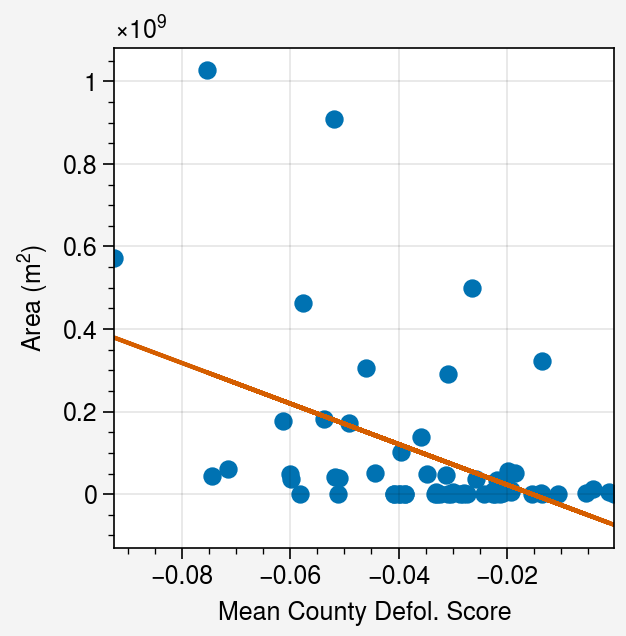

In [54]:
fig, ax = pplt.subplots()

x = county_2021['mean']
y = county_AS_ests

ax.scatter(x, y)

z = np.polyfit(x, y, 1)
p = np.poly1d(z)
ax.plot(x, p(x))

ax.format(ylabel='Area ($m^2$)', xlabel='Mean County Defol. Score')

fig.savefig('./Figures/AS_Satellite_County_Area_Comparison.svg')

## Comparison with % defoliated area

In [13]:
def prepare_data(area_filepath, year):
    # Load Data
    area = pd.read_csv(area_filepath)
    val_polygons = gpd.read_file('./Data/SpongyMoth.gdb')
    val_polygons = val_polygons[val_polygons['year'] == year]

    # Reproject data
    dest_crs = ccrs.LambertConformal(central_longitude=-76.0, central_latitude=42.0,)
    counties = gpd.read_file('./Data/counties_2021.geojson')
    counties = counties.to_crs(dest_crs)[['ADM2_NAME', 'geometry']]
    val_polygons = val_polygons.to_crs(dest_crs)
    
    # Estimate county-level Aerial Survey estimates
    county_AS_ests = [val_polygons.intersection(county.geometry).area.sum() for county in counties.itertuples()]
    
    combined = gpd.GeoDataFrame(pd.concat([area, counties], axis=1))
    combined['AS_total_area'] = county_AS_ests
    combined['perc_defol_area'] = combined['sum']/combined['count']
    
    return combined

In [14]:
combined = prepare_data('./Data/Enviro/defol_area_county_2021.csv', 2021)

C:\Users\camer\anaconda3\envs\bioee6550\lib\site-packages\shapely\set_operations.py:133: RuntimeWarning: invalid value encountered in intersection
  return lib.intersection(a, b, **kwargs)


In [15]:
combined

,ADM2_NAME,sum,count,ADM2_NAME,geometry,AS_total_area,perc_defol_area
0,Clinton,2.408995e+06,23554946,Clinton,"POLYGON ((155472.858 334219.168, 155532.480 33...",4.984422e+08,0.102271
1,Essex,4.105397e+06,55399812,Essex,"POLYGON ((166256.759 271101.913, 166093.767 27...",3.226889e+08,0.074105
2,Franklin,2.577847e+06,41256765,Franklin,"MULTIPOLYGON (((106351.718 332222.792, 106383....",0.000000e+00,0.062483
3,Hamilton,5.547236e+06,54333570,Hamilton,"POLYGON ((133312.277 214434.749, 134725.499 21...",0.000000e+00,0.102096
4,Herkimer,2.515713e+06,35611353,Herkimer,"POLYGON ((99516.133 120227.545, 99514.451 1204...",2.442781e+07,0.070644
...,...,...,...,...,...,...,...
57,Ulster,8.280393e+05,29554138,Ulster,"POLYGON ((135533.457 -44015.262, 135578.770 -4...",0.000000e+00,0.028018
58,Wayne,6.742203e+05,6297036,Wayne,"POLYGON ((-58002.670 113566.310, -58004.808 11...",0.000000e+00,0.107069
59,Westchester,1.026359e+05,6436065,Westchester,"MULTIPOLYGON (((182510.827 -120419.448, 182513...",0.000000e+00,0.015947
60,Wyoming,4.320416e+05,8115167,Wyoming,"POLYGON ((-202896.242 89166.767, -202517.917 8...",4.309064e+07,0.053239


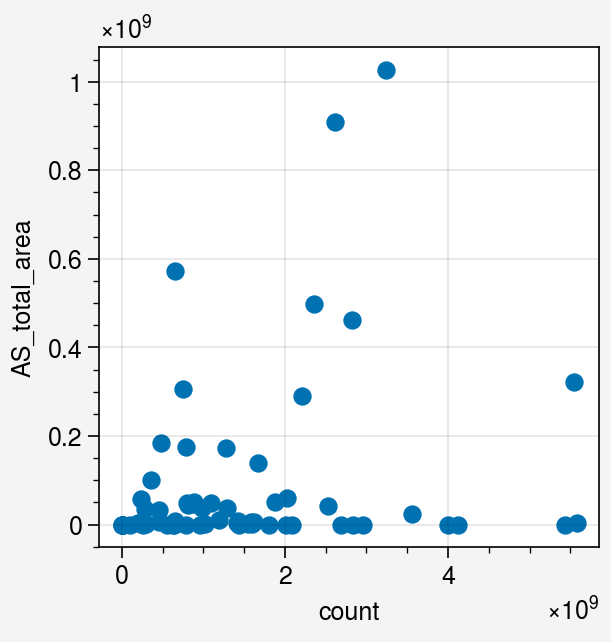

In [20]:
fig, ax = pplt.subplots()

ax.scatter(combined['count']*100, combined['AS_total_area'])